In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Dynamiczne zarządzanie pamięcią GPU włączone")
    except RuntimeError as e:
        print(e)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from src.preprocessing.preprocessing import load_and_split_data_for_vgg16, NUM_CLASSES 
from src.models.model_definition import create_vgg16_transfer_model, unfreeze_last_n_layers

In [4]:
BATCH_SIZE = 32
train_ds, val_ds, test_ds, ds_info = load_and_split_data_for_vgg16(batch_size=BATCH_SIZE)

In [5]:
model = create_vgg16_transfer_model(input_shape=(224, 224, 3))
model.summary()

Model: "VGG16_Transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14981448 (57.15 MB)
Trainable params: 266760 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_______

In [6]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,        
    restore_best_weights=True
)


In [7]:
model_checkpoint = ModelCheckpoint(
    filepath='models/best_vgg16_8class.h5', 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True
)

In [8]:
with tf.device('/GPU:0'):
    history1 = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_stage1_vgg16_8class.h5')

Epoch 1/10



131/131 [==============================] - 260s 2s/step - loss: 2.5719 - accuracy: 0.5372 - val_loss: 0.7506 - val_accuracy: 0.7539
Epoch 2/10


D:\Repos\food-recognition\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 259s 2s/step - loss: 1.1135 - accuracy: 0.6203 - val_loss: 0.7926 - val_accuracy: 0.7403
Epoch 3/10
131/131 [==============================] - 260s 2s/step - loss: 1.0794 - accuracy: 0.6299 - val_loss: 0.7263 - val_accuracy: 0.7529
Epoch 4/10
131/131 [==============================] - 260s 2s/step - loss: 1.0542 - accuracy: 0.6338 - val_loss: 0.6784 - val_accuracy: 0.7634
Epoch 5/10
131/131 [==============================] - 263s 2s/step - loss: 1.0745 - accuracy: 0.6328 - val_loss: 0.7477 - val_accuracy: 0.7550
Epoch 6/10
131/131 [==============================] - 264s 2s/step - loss: 1.0150 - accuracy: 0.6508 - val_loss: 0.6919 - val_accuracy: 0.7665
Epoch 7/10
131/131 [==============================] - 265s 2s/step - loss: 1.0297 - accuracy: 0.6458 - val_loss: 0.6816 - val_accuracy: 0.7686
Epoch 8/10
131/131 [==============================] - 265s 2s/step - loss: 1.0006 - accuracy: 0.6590 - val_loss: 0.7213 - val_accuracy: 0.7613
Epoch 9/10

In [9]:
model = unfreeze_last_n_layers(model, fine_tune_at=4, lr=1e-5)
model.summary()

Model: "VGG16_Transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14981448 (57.15 MB)
Trainable params: 7346184 (28.02 MB)
Non-trainable params: 7635264 (29.13 MB)
______

In [10]:
with tf.device('/GPU:0'):
    history2 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=25,
        initial_epoch=history1.epoch[-1]+1,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_vgg16_8class.h5')

Epoch 10/25
131/131 [==============================] - 307s 2s/step - loss: 0.8869 - accuracy: 0.6952 - val_loss: 0.5625 - val_accuracy: 0.8126
Epoch 11/25
131/131 [==============================] - 310s 2s/step - loss: 0.8134 - accuracy: 0.7293 - val_loss: 0.5004 - val_accuracy: 0.8251
Epoch 12/25
131/131 [==============================] - 308s 2s/step - loss: 0.7310 - accuracy: 0.7476 - val_loss: 0.5231 - val_accuracy: 0.8241
Epoch 13/25
131/131 [==============================] - 308s 2s/step - loss: 0.6920 - accuracy: 0.7589 - val_loss: 0.4880 - val_accuracy: 0.8304
Epoch 14/25
131/131 [==============================] - 314s 2s/step - loss: 0.6296 - accuracy: 0.7911 - val_loss: 0.4537 - val_accuracy: 0.8429
Epoch 15/25
131/131 [==============================] - 306s 2s/step - loss: 0.6115 - accuracy: 0.7973 - val_loss: 0.4651 - val_accuracy: 0.8461
Epoch 16/25
131/131 [==============================] - 302s 2s/step - loss: 0.5869 - accuracy: 0.7966 - val_loss: 0.4417 - val_accuracy:

In [11]:
model.save('models/final_vgg16_8class_compressed.h5', include_optimizer=False)
model.summary()

In [12]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Trening Accuracy')
    plt.plot(epochs_range, val_acc, label='Walidacja Accuracy')
    plt.legend(loc='lower right')
    plt.title('Dokładność (Accuracy)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Trening Loss')
    plt.plot(epochs_range, val_loss, label='Walidacja Loss')
    plt.legend(loc='upper right')
    plt.title('Strata (Loss)')
    plt.grid(True)
    
    plt.show()

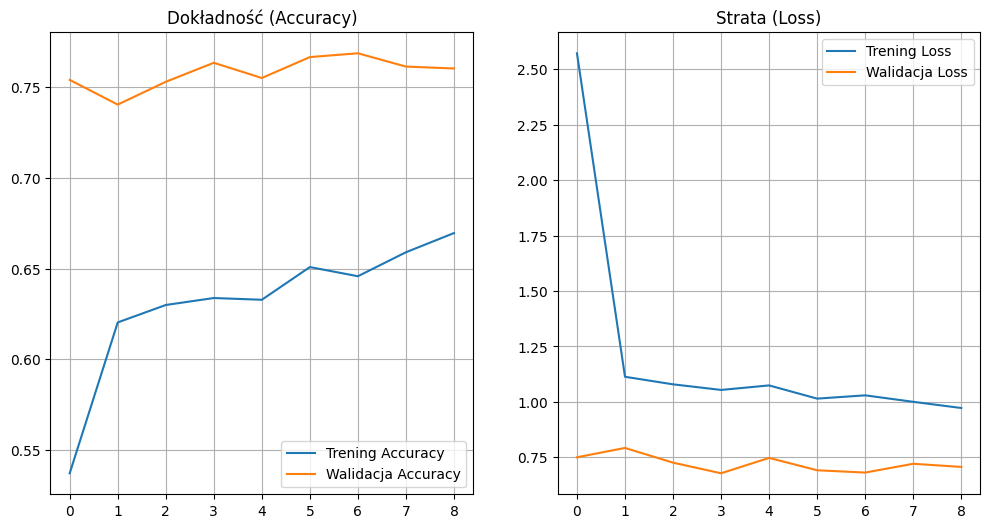

In [13]:
plot_training_history(history1)

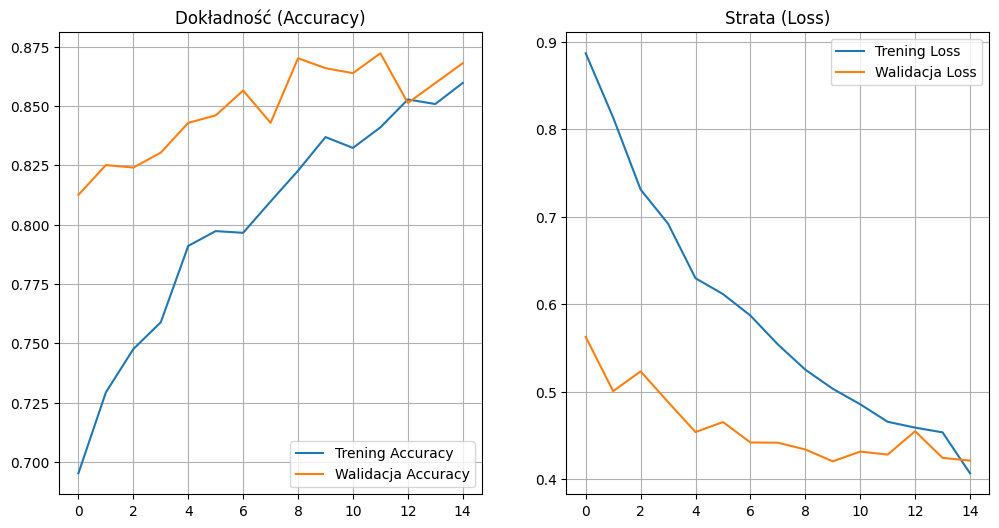

In [14]:
plot_training_history(history2)